In [8]:
import numpy as np
import json
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import multivariate_normal
from scipy.stats import invwishart as iw
from data_fusion import Data_fusion
import matplotlib.pyplot as plt
import random
import json

In [9]:
RADIUS_GROUND_M = 6378 * 10**3
RADIUS_GPS_M = RADIUS_GROUND_M + 20180 * 10**3
RADIUS_GLONASS_M = RADIUS_GROUND_M + 19140 * 10**3
RADIUS_GALILEO_M = RADIUS_GROUND_M + 23222 * 10**3
r = [RADIUS_GROUND_M, RADIUS_GPS_M, RADIUS_GLONASS_M, RADIUS_GALILEO_M]

#this sample area only applies to robot & ground emitters
SAMPLE_AREA = 1

In [10]:
def fz(x, y, r):
    return np.sqrt(r**2-x**2-y**2)

def randomly_sample_point(area):
    x = random.randint(-area*10**3, area*10**3)
    y = random.randint(-area*10**3, area*10**3)
    return x, y

def check_validity(ground, pos_sat):
    g_hat = ground / np.linalg.norm(ground)
    p_hat = pos_sat / np.linalg.norm(pos_sat)
    proj = np.dot(g_hat, p_hat)
    return proj>=0
        

TypeError: 'int' object is not iterable

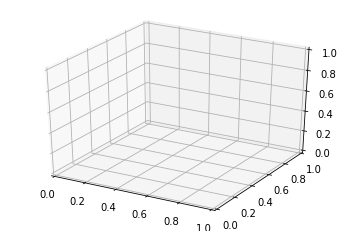

In [13]:
fig = plt.figure()
ax = plt.axes(projection='3d')

group_name = ["GROUND", "GPS", "GLONASS", "GALILEO"]
colors = ['red', 'blue', 'green', 'orange']

file_dict = {
    "technique":0,
    "emitters":{}
}

ref = np.array([0, 0, 0])
for j, radi in enumerate(r):
    group_dict = {
        "corr": 2*np.random.rand(),
        "data": []
    }
    if(group_name[j]=="GROUND"):
        for i in range(6):
            x, y = randomly_sample_point(SAMPLE_AREA)
            z = fz(x, y, radi)
            group_dict["data"].append([x,y,z])
            if(i==5):
                ax.scatter(x, y, z, color=colors[j], label=group_name[j])
            else:
                ax.scatter(x, y, z, color=colors[j])
                
            ref = np.array([x, y, z])
            
    else:
        num_valid = 0
        while num_valid < 6:
            x, y = randomly_sample_point(6378)
            z = fz(x, y, radi)
            sat = np.array([x, y, z])
            if check_validity(ref, sat):
                num_valid += 1
            group_dict["data"].append([x,y,z])
            if(num_valid==5):
                ax.scatter(x, y, z, color=colors[j], label=group_name[j])
            else:
                ax.scatter(x, y, z, color=colors[j])

                            
    file_dict["emitters"][group_name[j]] = group_dict

with open("node_config.json", "w") as outfile: 
    json.dump(file_dict, outfile, indent=4)

robot_pose_dict = {
    "positions":[]
}

x_offset = random.randint(0, 600)
y_offset = random.randint(0, 600)
for i in range(500):
    x, y = randomly_sample_point(SAMPLE_AREA)
    x += x_offset
    y += y_offset
    z = fz(x, y, RADIUS_GROUND_M + random.randint(0, 121))
    robot_pose_dict["positions"].append([x,y,z])
#     if i == 99:
#         ax.scatter(x, y, z, color='red', label='robot positions')
#     else:
#         ax.scatter(x, y, z, color='red')        
        
ax.legend()
with open("robot_poses.json", "w") as outfile: 
    json.dump(robot_pose_dict, outfile, indent=4)



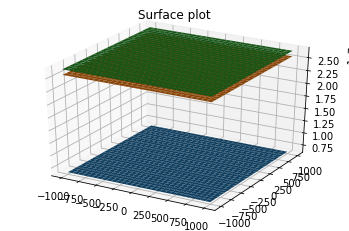

In [12]:
x = np.outer(np.linspace(-SAMPLE_AREA*10**3, SAMPLE_AREA*10**3, 30), np.ones(30))
y = x.copy().T # transpose
r = RADIUS_GROUND_M
z = np.sqrt(r**2-x**2-y**2)

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(x, y, z, edgecolor='none')

r = RADIUS_GLONASS_M
z = np.sqrt(r**2-x**2-y**2)
ax.plot_surface(x, y, z, edgecolor='none')

r = RADIUS_GPS_M
z = np.sqrt(r**2-x**2-y**2)
ax.plot_surface(x, y, z, edgecolor='none')


ax.set_title('Surface plot')
plt.show()

In [11]:
#take the vector to the robot pose and then project vector to satellite onto robot pose and if thats negative discard